In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [26]:
# Simulated dataset for demonstration
data = {
    "age": [25, 45, 35, 50, 23, 36, 40, 28, 31, 49],
    "income": [50000, 80000, 60000, 120000, 45000, 75000, 90000, 52000, 64000, 110000],
    "loan_amount": [20000, 30000, 25000, 50000, 18000, 27000, 40000, 22000, 24000, 45000],
    "credit_history": ["good", "excellent", "good", "poor", "good", "excellent", "excellent", "good", "good", "poor"],
    "loan_approved": ["yes", "yes", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]
}

df = pd.DataFrame(data)

# Encode categorical columns with separate LabelEncoders
le_credit_history = LabelEncoder()
df["credit_history"] = le_credit_history.fit_transform(df["credit_history"])  # Encode credit_history

le_loan_approved = LabelEncoder()
df["loan_approved"] = le_loan_approved.fit_transform(df["loan_approved"])  # Encode loan_approved

# Save the classes for later use
credit_history_classes = le_credit_history.classes_
loan_approved_classes = le_loan_approved.classes_

# Features and target
X = df[["age", "income", "loan_amount", "credit_history"]]
y = df["loan_approved"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build ANN

In [27]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Add dropout to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the Model

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.5972 - val_accuracy: 0.5000 - val_loss: 0.5779
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.6667 - loss: 0.5713 - val_accuracy: 1.0000 - val_loss: 0.5691
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6667 - loss: 0.6040 - val_accuracy: 1.0000 - val_loss: 0.5595
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5000 - loss: 0.5872 - val_accuracy: 1.0000 - val_loss: 0.5479
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8333 - loss: 0.5169 - val_accuracy: 1.0000 - val_loss: 0.5368
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6667 - loss: 0.5993 - val_accuracy: 1.0000 - val_loss: 0.5260
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8333 - loss: 0.4681 - val_accuracy: 1.0000 - val_loss: 0.5154
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 1.0000 - loss: 0.4176 - val_accuracy: 1.0000 - val_loss: 0.50

## Evaluate the Model

In [29]:
# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


## Visualize Training History

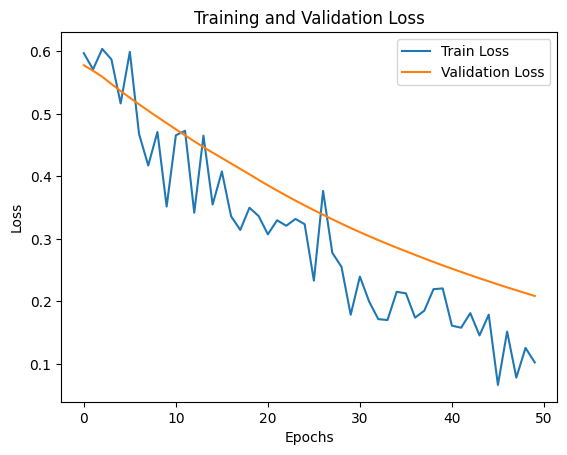

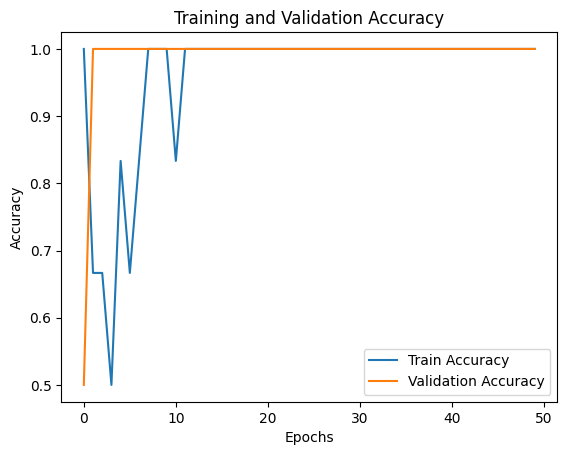

In [30]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

##Single Prediction from User Input

In [31]:
def predict_loan_approval(age, income, loan_amount, credit_history):
    # Ensure the input value for credit_history is encoded
    if credit_history not in credit_history_classes:
        raise ValueError(f"Credit history '{credit_history}' is not recognized. Available values: {list(credit_history_classes)}")

    credit_history_encoded = le_credit_history.transform([credit_history])[0]  # Encode credit_history

    # Prepare the input data
    input_data = pd.DataFrame({
        "age": [age],
        "income": [income],
        "loan_amount": [loan_amount],
        "credit_history": [credit_history_encoded]
    })

    # Standardize the input features
    scaled_input = scaler.transform(input_data)

    # Predict loan approval
    approval_prob = model.predict(scaled_input)[0][0]  # Probability
    approved = approval_prob > 0.5  # Threshold

    # Decode the result back to the original 'yes'/'no'
    approved_label = le_loan_approved.inverse_transform([int(approved)])[0]
    return {"approval_probability": approval_prob, "approved": approved_label}

In [35]:
# Example prediction
age = 15
income = 7
loan_amount = 2500000
credit_history = "poor"  # Input as a string

try:
    result = predict_loan_approval(age, income, loan_amount, credit_history)
    print(f"Approval Probability: {result['approval_probability']:.2f}")
    print(f"Loan Approved: {result['approved']}")
except ValueError as e:
    print(e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Approval Probability: 0.00
Loan Approved: no
